1. You hope to have 2,000,000 when you retire in 20 years. You
expect to earn 10% on your investments. How much must you save each year
starting today (i.e., at dates 0, 1, . . . , 19) to reach your target?

In [1]:
import numpy as np

fv_factors = 1.1**np.arange(20, 0, -1)
fv_factor = np.sum(fv_factors)
savings = 2000000 / np.sum(fv_factors)
print(f"I need to save ${savings:,.2f} each year.")

I need to save $31,744.77 each year.


2. A five-year bond with 1,000 face value pays coupons of 30 every
six months (the first of ten coupons will be six months from today). It is
selling for 1,100. What is its yield (expressed as an annual rate)?

In [2]:
import numpy_financial as npf 

cash_flows = 30 * np.ones(10)
cash_flows[-1] += 1000
cash_flows = np.concatenate(([-1100], cash_flows))
irr = npf.irr(cash_flows)
print(f"The bond yield is {2*irr:.2%}.")

The bond yield is 3.79%.


5. A company’s EBIAT in the past year was 50 million. It had
capital expenditures of 40 million and depreciation of 20 million. Its net
working capital at the end of the past year was 100 million. You project
that everything (EBIAT, capital expenditures, depreciation, and net working
capital) will grow at 4% forever. The appropriate discount rate is 10%. What
is the value of the company?

In [3]:
EBIAT = 50*1.04
CapEx = 40*1.04
Depr = 20*1.04
NWC = 100*1.04
DeltaNWC = NWC - 100
CashFlow = EBIAT + Depr - CapEx - DeltaNWC
Value = CashFlow / (0.10 - 0.04)
print(f"The value of the company is ${Value:,.0f} million.")

The value of the company is $453 million.


6. Stock A has an expected return of 10% and a standard deviation
of 20%. Stock B has an expected return of 14% and a standard deviation of
25%. The correlation of the two stock returns is 50%.

(a) What is the expected return of a portfolio that is 50% in stock A and
50% in stock B?

In [4]:
means = np.array([0.1, 0.14])
wts = np.array([0.5, 0.5])
portfolio_mean = wts @ means
print(f"The portfolio mean is {portfolio_mean:.2%}")

The portfolio mean is 12.00%


(b) What is the standard deviation of a portfolio that is 50% in stock A and
50% in stock B?

In [5]:
stdevs = np.array([0.2, 0.25])
corr = np.array(
    [
        [1, 0.5],
        [0.5, 1]
    ]
)
cov = np.diag(stdevs) @ corr @ np.diag(stdevs)
portfolio_var = wts @ cov @ wts
portfolio_stdev = np.sqrt(portfolio_var)
print(f"The portfolio standard deviation is {portfolio_stdev:.2%}")

The portfolio standard deviation is 19.53%


In [6]:
# method 2

np.sqrt(wts[0]**2*stdevs[0]**2 + wts[1]**2*stdevs[1]**2 + 2*wts[0]*wts[1]*0.5*stdevs[0]*stdevs[1])

0.19525624189766638

(c) Plot the expected returns and standard deviations of all portfolios of
stock A and stock B in which the weights on both stocks are nonnegative
(no short sales).

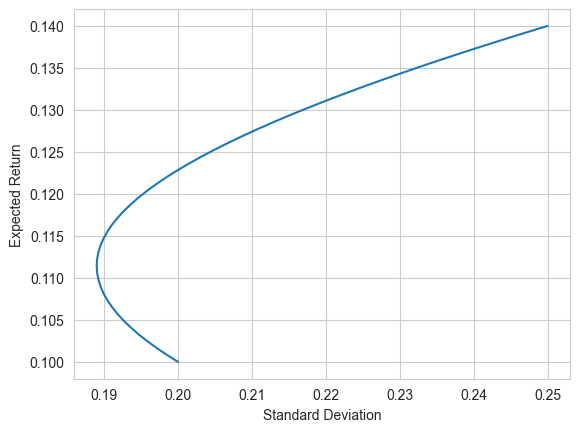

In [7]:
portfolio_means = [np.array([w, 1-w]) @ means for w in np.linspace(0, 1, 50)]
portfolio_vars =  [np.array([w, 1-w]) @ cov @ np.array([w, 1-w]) for w in np.linspace(0, 1, 50)]
portfolio_stdevs = [np.sqrt(var) for var in portfolio_vars]

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid") 
plt.plot(portfolio_stdevs, portfolio_means)
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.show()

(d) Suppose the risk-free rate is 2%. What is the maximum Sharpe ratio
(tangency) portfolio of the two stocks? What is its Sharpe ratio?

In [8]:
from cvxopt import matrix
from cvxopt.solvers import qp

rf = 0.02
r = 12

P = cov
q = np.zeros((2, 1))
A = (means - rf*np.ones(2)).reshape(1, 2)
b = np.array([r-rf]).reshape(1, 1)

sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
)
w = np.array(sol["x"]).flatten()
w = w / np.sum(w)
print(f"The tangency portfolio is {w[0]:.2%} in the first asset and {w[1]:.2%} in the second.")

sharpe = (w @ means - rf) / np.sqrt(w @ cov @ w)
print(f"The maximum Sharpe ratio is {sharpe:.2%}.")

The tangency portfolio is 41.67% in the first asset and 58.33% in the second.
The maximum Sharpe ratio is 51.43%.


7. A firm’s beta is 1.25. The market risk premium is 8%. The
risk-free rate is 2%. The value of the firm’s equity is 3 billion, and the value
of its debt is 1 billion. Its borrowing rate is 5% and its tax rate is 40%.
(a) What is its cost of equity capital?
(b) What is its weighted average cost of capital?

In [9]:
beta = 1.25
mkt_risk_prem = 0.08
rf = 0.02
firm_risk_prem = beta*mkt_risk_prem
firm_cost_equity = rf + firm_risk_prem
print(f"The firm's cost of equity capital is {firm_cost_equity:.2%}")

equity_pct = 3/4
debt_pct = 1/4
tax_rate = 0.4
debt_rate = 0.05
WACC = equity_pct*firm_cost_equity + debt_pct*(1-tax_rate)*debt_rate
print(f"The firm's weighted average cost of capital is {WACC:.2%}.")

The firm's cost of equity capital is 12.00%
The firm's weighted average cost of capital is 9.75%.
